In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
import pandas as pd

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
data = pd.read_csv("all_templates.csv", header = None)
train_y = np.array(data[data.shape[1]-1])  # метки выборки
train_y = train_y.reshape(train_y.shape[0],1)
train_y = train_y.T
data = data.drop([data.shape[1]-1], axis=1)
train_x = np.array(data).T  # сама выборка

test = pd.read_csv("template_1_test.csv", header=None)
size = train_x.shape[0]
size1 = train_x.shape[1]

In [3]:
sess = tf.Session()

In [4]:
x = train_x.T
x = np.array(x,dtype = float)
y = train_y.T
y = np.array(y,dtype = float)
y.shape

(20, 1)

In [5]:
x_ = tf.placeholder(name="input", shape=[size1, size], dtype=tf.float32)
y_ = tf.placeholder(name= "output", shape=[size1, 1], dtype=tf.float32)

hidden_neurons = 8 #количество нейронов в скрытом слое
w1 = tf.Variable(tf.random_uniform(shape=[size,hidden_neurons ]))
b1 = tf.Variable(tf.constant(value=0.0, shape=[hidden_neurons ], dtype=tf.float32))
layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x_, w1), b1))

w2 = tf.Variable(tf.random_uniform(shape=[hidden_neurons ,1]))
b2 =  tf.Variable(tf.constant(value=0.0, shape=[1], dtype=tf.float32))

nn_output = tf.nn.relu(tf.add(tf.matmul(layer1, w2), b2))

In [6]:
gd = tf.train.GradientDescentOptimizer(0.001)
loss =  tf.reduce_mean(tf.square(nn_output- y_))
train_step = gd.minimize(loss)

In [7]:
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
eras = 100 # количество эпох

error = []

for _ in range(eras):
    _,err = sess.run([train_step, loss], feed_dict={x_:x, y_:y})
    error.append(err)

In [9]:
y = sess.run(nn_output, feed_dict={x_:x})

In [10]:
print(nn_output)

Tensor("Sigmoid:0", shape=(20, 1), dtype=float32)


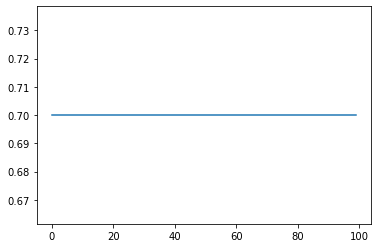

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

er_y = np.array(range(0,eras))
plt.plot(er_y, error)

In [12]:
t_y = np.array(range(0,size))

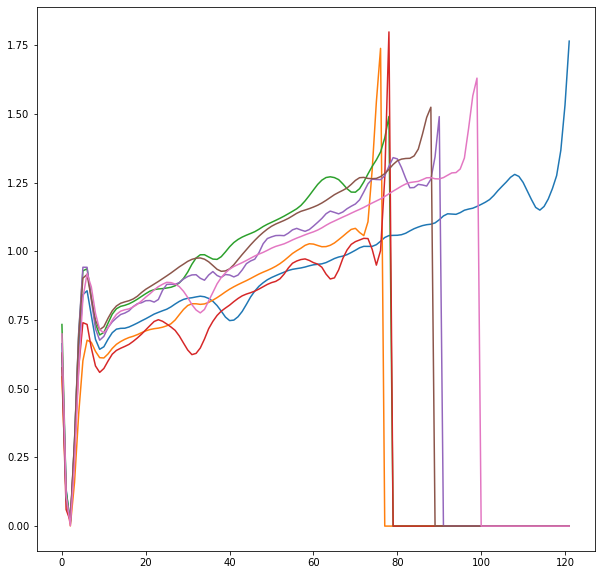

In [13]:
plt.figure(figsize=(10,10))
plt.plot(t_y, x[0])
plt.plot(t_y, x[1])
plt.plot(t_y, x[3])
plt.plot(t_y, x[4])
plt.plot(t_y, x[5])
plt.plot(t_y, x[6])
plt.plot(t_y, x[7])